# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


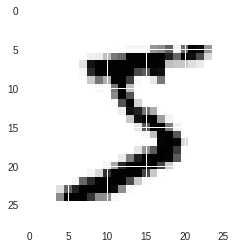

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 1 ))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.2466 - acc: 0.9212
Epoch 2/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.0682 - acc: 0.9796
Epoch 3/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0496 - acc: 0.9849
Epoch 4/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0397 - acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0335 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0279 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0241 - acc: 0.9928
Epoch 8/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0216 - acc: 0.9931
Epoch 9/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0179 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 19s 319us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03277657801293244, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.81021913e-07 2.75808247e-06 1.97809641e-05 1.09601453e-04
  1.00514804e-07 2.38370035e-06 1.79355482e-08 9.99816954e-01
  7.74307136e-06 3.96484393e-05]
 [1.83773480e-07 6.76003920e-09 9.99999642e-01 5.57263302e-09
  7.61775421e-10 1.38296962e-16 5.13068841e-12 1.85249700e-08
  1.68122966e-07 1.37731614e-11]
 [2.64072314e-12 9.99983907e-01 9.63605089e-06 1.15095365e-13
  5.49598917e-06 2.50732379e-10 2.07590460e-08 1.52063038e-07
  6.47060688e-07 1.45801513e-08]
 [9.99973059e-01 5.55682328e-15 3.98838207e-09 8.03529049e-11
  1.69556915e-06 1.21597836e-07 2.18023004e-07 1.51454321e-10
  8.05924714e-08 2.48673296e-05]
 [4.47137580e-08 3.34789391e-10 8.34609359e-09 1.12318058e-10
  9.99992967e-01 1.64028037e-07 1.10727591e-07 9.14549808e-14
  3.08992387e-10 6.83483768e-06]
 [1.53846955e-12 9.99989033e-01 7.80555456e-06 3.33897135e-14
  2.51889628e-06 9.47126960e-11 2.43629010e-08 5.70623939e-08
  5.66314782e-07 6.38142428e-09]
 [6.63484934e-10 1.00629304e-10 1.38110717e-10 1.02097410e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

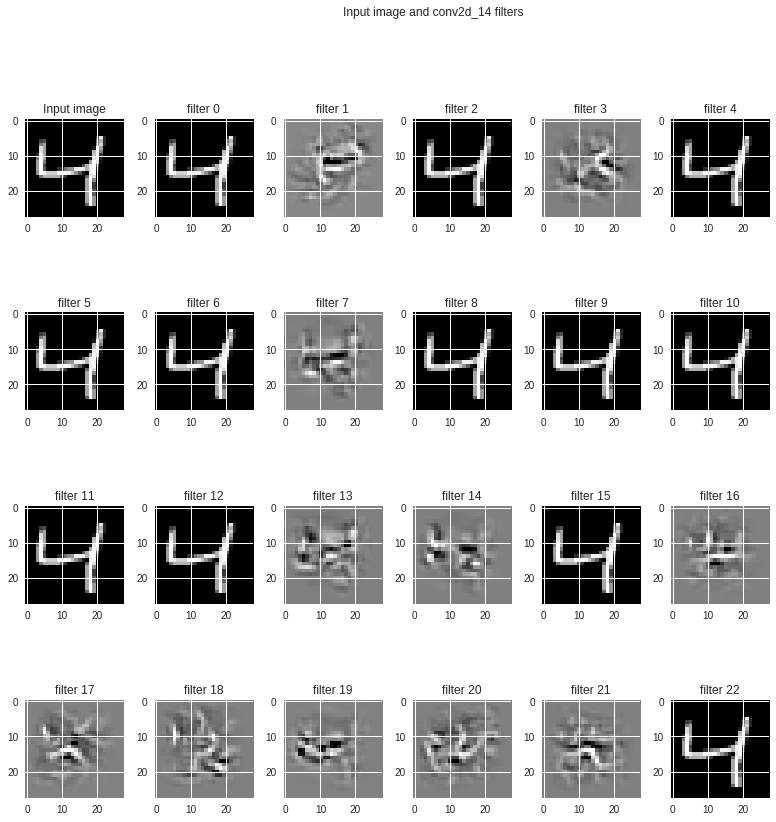

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()